In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error
from sklego.preprocessing import RepeatingBasisFunction

%matplotlib inline

In [2]:
!pip install sklego

# Удаление дубликатов в данных

In [5]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4],
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [6]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [7]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [8]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [9]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [10]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [11]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [12]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [13]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan],
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna()

,0,1,2,3


In [15]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [18]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.593030,NaN,NaN
1,-1.717847,NaN,NaN
2,0.256295,NaN,-0.748812
3,1.491954,NaN,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [19]:
df.fillna(0)

,0,1,2
0,-0.593030,0.000000,0.000000
1,-1.717847,0.000000,0.000000
2,0.256295,0.000000,-0.748812
3,1.491954,0.000000,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [20]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.593030,0.500000,0.000000
1,-1.717847,0.500000,0.000000
2,0.256295,0.500000,-0.748812
3,1.491954,0.500000,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [21]:
df.fillna(method="bfill")

,0,1,2
0,-0.593030,-0.525137,-0.748812
1,-1.717847,-0.525137,-0.748812
2,0.256295,-0.525137,-0.748812
3,1.491954,-0.525137,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [22]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.593030,NaN,-0.748812
1,-1.717847,NaN,-0.748812
2,0.256295,-0.525137,-0.748812
3,1.491954,-0.525137,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [23]:
df.fillna(df.mean())

,0,1,2
0,-0.593030,0.343653,-0.884442
1,-1.717847,0.343653,-0.884442
2,0.256295,0.343653,-0.748812
3,1.491954,0.343653,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


In [24]:
df.fillna(df.median())

,0,1,2
0,-0.593030,0.315484,-0.748812
1,-1.717847,0.315484,-0.748812
2,0.256295,0.315484,-0.748812
3,1.491954,0.315484,-0.870867
4,-0.544943,-0.525137,0.771919
5,-0.062559,0.315484,-3.122829
6,0.425768,1.240612,-0.451619


Медиана более устойчива к выбросам

In [25]:
data_all = []
for i in range(10000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)

data_all = np.array(data_all)

<Axes: >

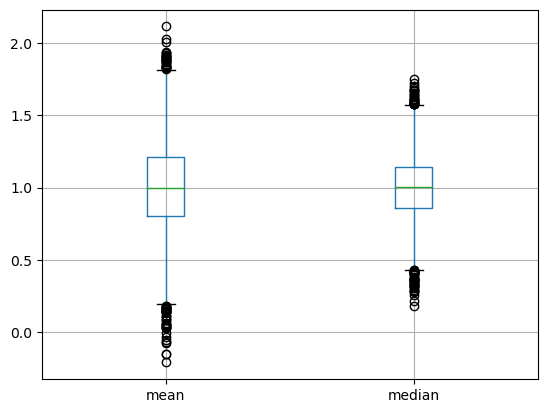

In [26]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [27]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.593030,NaN,NaN,1
1,-1.717847,NaN,NaN,1
2,0.256295,NaN,-0.748812,0
3,1.491954,NaN,-0.870867,0
4,-0.544943,-0.525137,0.771919,0
5,-0.062559,0.315484,-3.122829,0
6,0.425768,1.240612,-0.451619,0


Замена значений

In [28]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [29]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [30]:
data = pd.Series(["male"]*10 + ["female"]*5)
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [31]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [35]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [36]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ...

In [37]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [38]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,False,False,True
7,False,True,False,False,False,False
8,False,False,True,False,False,False
9,False,False,False,True,False,False


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Работа со временем

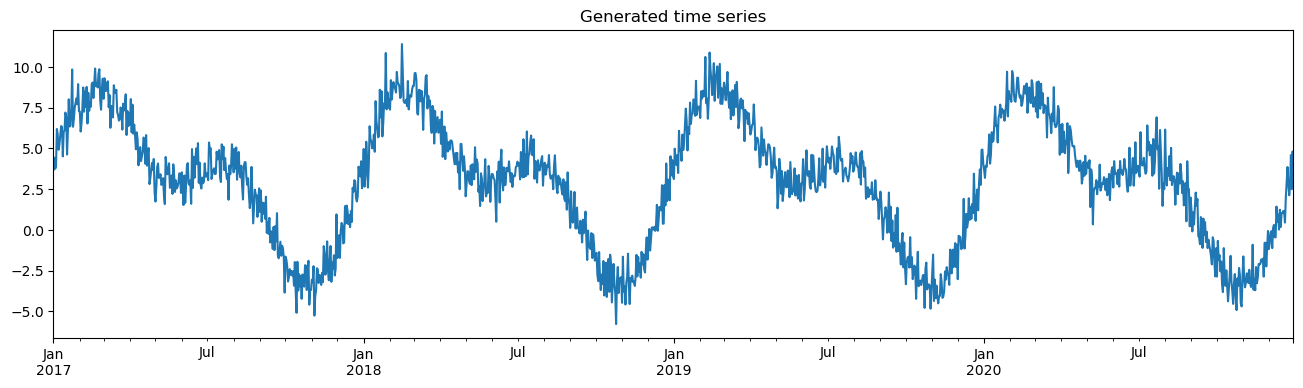

In [40]:
np.random.seed(12345)

range_of_dates = pd.date_range(start="2017-01-01", end="2020-12-30")
X = pd.DataFrame(index=range_of_dates)

X["day_nr"] = range(len(X))
X["day_of_year"] = X.index.day_of_year

signal_1 = 3 + 4 * np.sin(X["day_nr"] / 365 * 2 * np.pi)
signal_2 = 3 * np.sin(X["day_nr"] / 365 * 4 * np.pi + 365/2)
noise = np.random.normal(0, 0.85, len(X))

y = signal_1 + signal_2 + noise

y.plot(figsize=(16,4), title="Generated time series");

In [41]:
X

,day_nr,day_of_year
2017-01-01,0,1
2017-01-02,1,2
2017-01-03,2,3
2017-01-04,3,4
2017-01-05,4,5
...,...,...
2020-12-26,1455,361
2020-12-27,1456,362
2020-12-28,1457,363
2020-12-29,1458,364


In [44]:
results_df = y.to_frame()
results_df.columns = ["actuals"]

In [45]:
TRAIN_END = 3 * 365

## Подход 1 - категориальные переменные

In [46]:
X_1 = pd.DataFrame(data=pd.get_dummies(X.index.month, drop_first=True, prefix="month"))
X_1.index = X.index
X_1

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2017-01-01,False,False,False,False,False,False,False,False,False,False,False
2017-01-02,False,False,False,False,False,False,False,False,False,False,False
2017-01-03,False,False,False,False,False,False,False,False,False,False,False
2017-01-04,False,False,False,False,False,False,False,False,False,False,False
2017-01-05,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,False,False,False,False,False,False,False,False,False,False,True
2020-12-27,False,False,False,False,False,False,False,False,False,False,True
2020-12-28,False,False,False,False,False,False,False,False,False,False,True
2020-12-29,False,False,False,False,False,False,False,False,False,False,True


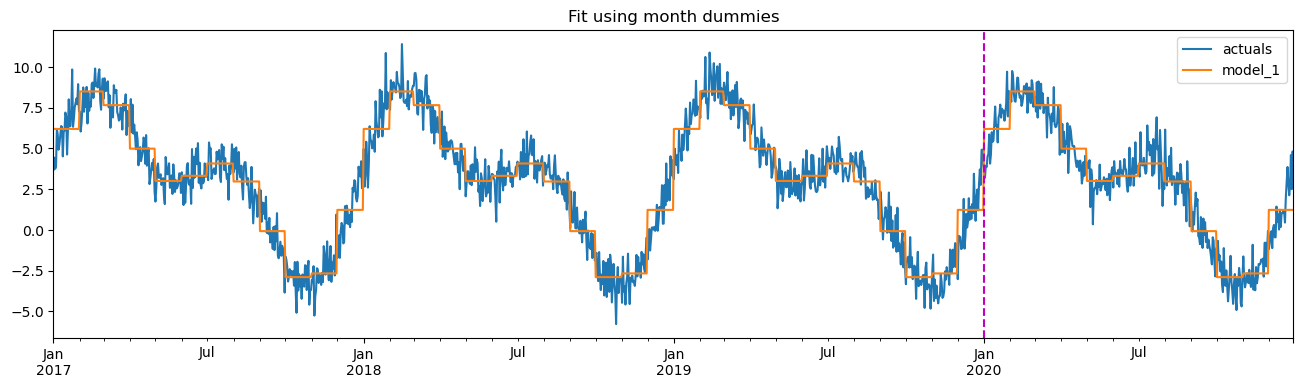

In [47]:
model_1 = LinearRegression().fit(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_1"] = model_1.predict(X_1)
results_df[["actuals", "model_1"]].plot(figsize=(16,4), title="Fit using month dummies")

plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [48]:
print(model_1.score(X_1.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_1.score(X_1.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9032966594007233
0.9013303218307307


## Подход 2 - циклическое кодирование с синусом/косинусом

In [49]:
def sin_transformer(period):
 return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))

def cos_transformer(period):
 return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

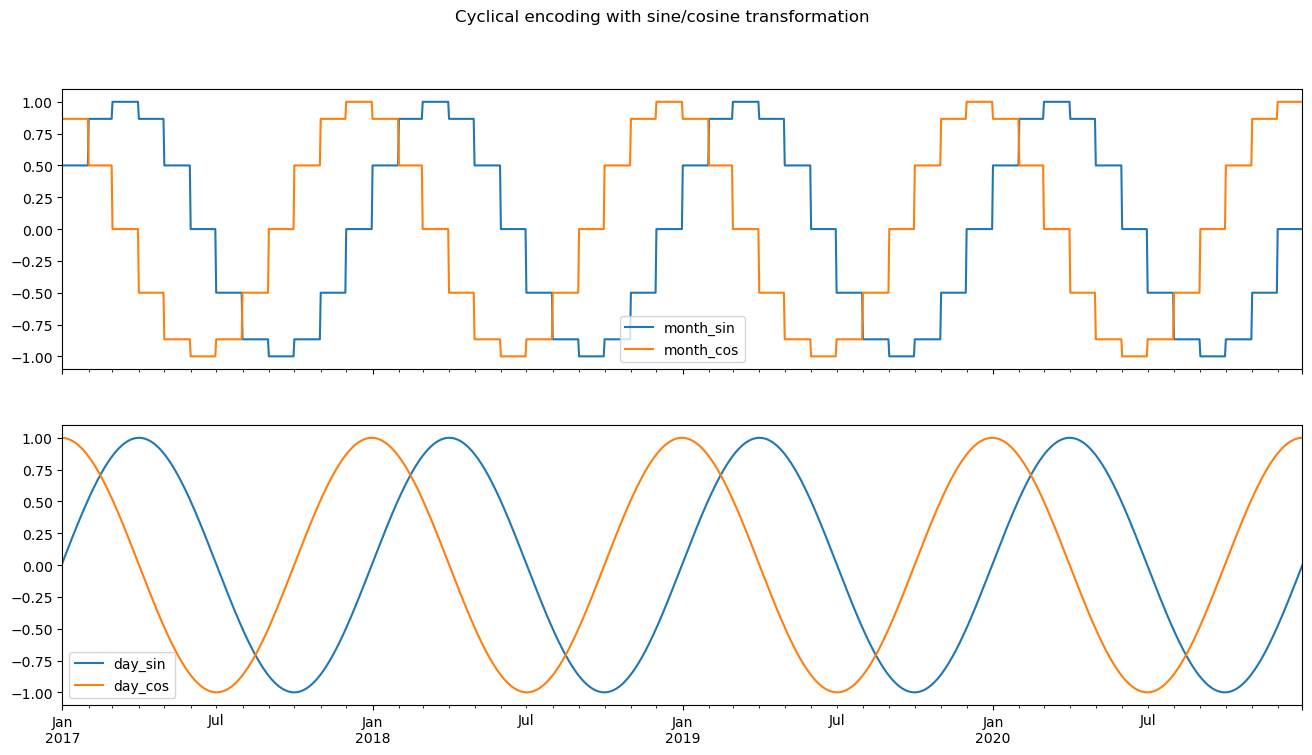

In [50]:
X_2 = X.copy()
X_2["month"] = X_2.index.month

X_2["month_sin"] = sin_transformer(12).fit_transform(X_2)["month"]
X_2["month_cos"] = cos_transformer(12).fit_transform(X_2)["month"]

X_2["day_sin"] = sin_transformer(365).fit_transform(X_2)["day_of_year"]
X_2["day_cos"] = cos_transformer(365).fit_transform(X_2)["day_of_year"]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X_2[["month_sin", "month_cos"]].plot(ax=ax[0])
X_2[["day_sin", "day_cos"]].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

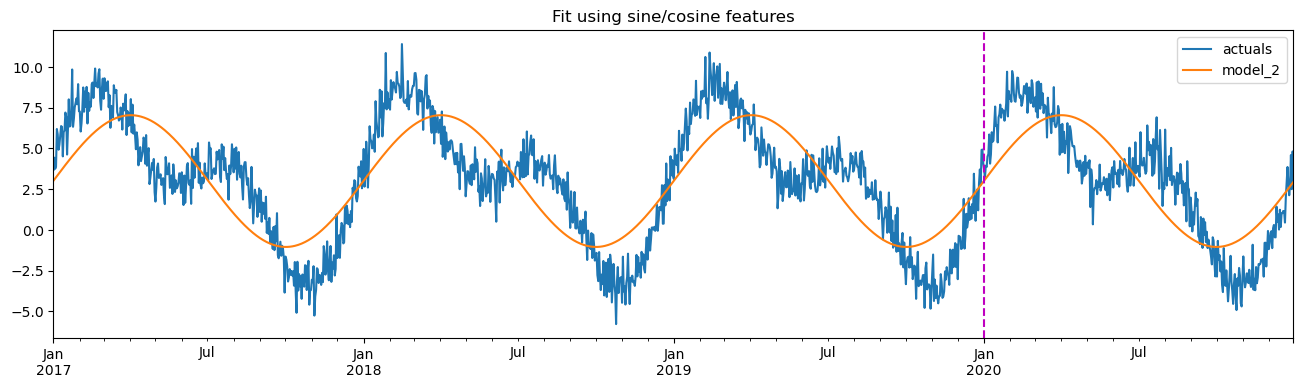

In [51]:
X_2_daily = X_2[["day_sin", "day_cos"]]

model_2 = LinearRegression().fit(X_2_daily.iloc[:TRAIN_END],
 y.iloc[:TRAIN_END])

results_df["model_2"] = model_2.predict(X_2_daily)
results_df[["actuals", "model_2"]].plot(figsize=(16,4),
 title="Fit using sine/cosine features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [52]:
print(model_2.score(X_2_daily.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_2.score(X_2_daily.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.6100625066720329
0.5899965166638506


In [53]:
X_concat = pd.concat([X_1, X_2_daily], axis=1)

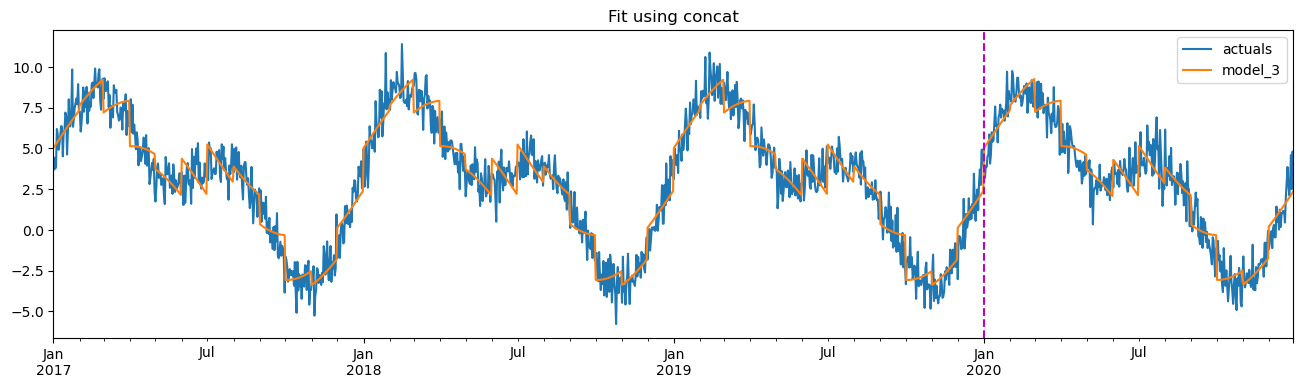

In [54]:
model_concat = LinearRegression().fit(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END])

results_df["model_3"] = model_concat.predict(X_concat)
results_df[["actuals", "model_3"]].plot(figsize=(16,4), title="Fit using concat")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [55]:
print(model_concat.score(X_concat.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_concat.score(X_concat.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9211414853927441
0.9145793856126093


## Подход 3 - радиальные базисные функции

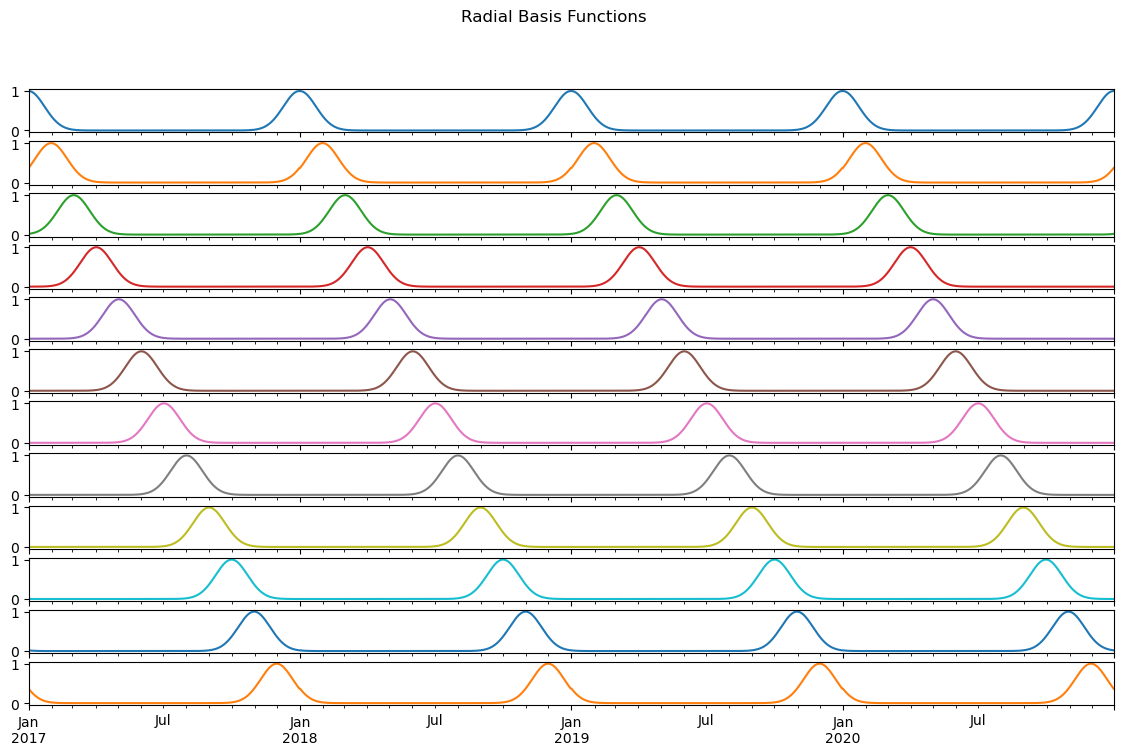

In [56]:
rbf = RepeatingBasisFunction(n_periods=12,
                             column="day_of_year",
                             input_range=(1,365),
                             remainder="drop")
rbf.fit(X)
X_3 = pd.DataFrame(index=X.index, data=rbf.transform(X))

X_3.plot(subplots=True, figsize=(14, 8), sharex=True,
         title="Radial Basis Functions", legend=False);

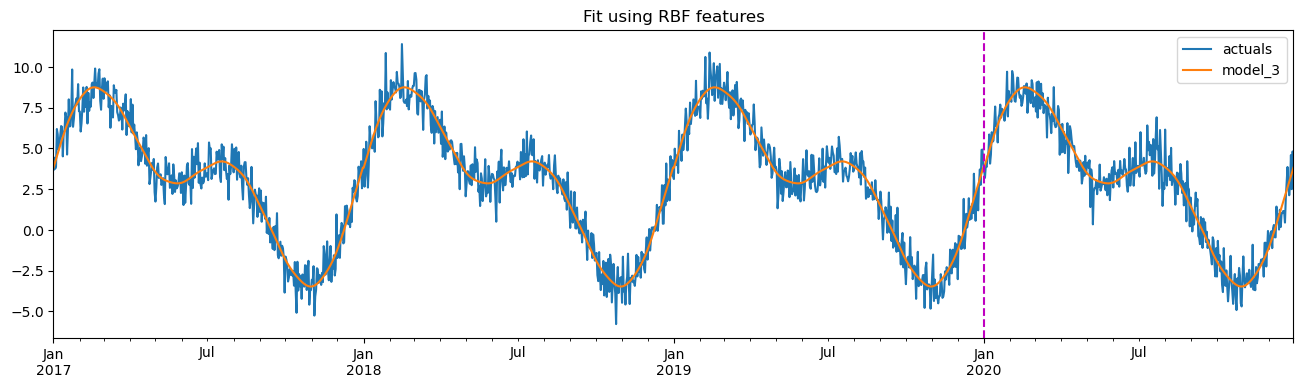

In [57]:
model_3 = LinearRegression().fit(X_3.iloc[:TRAIN_END],
                                 y.iloc[:TRAIN_END])

results_df["model_3"] = model_3.predict(X_3)
results_df[["actuals", "model_3"]].plot(figsize=(16,4),
                                        title="Fit using RBF features")
plt.axvline(date(2020, 1, 1), c="m", linestyle="--");

In [58]:
print(model_3.score(X_3.iloc[:TRAIN_END], y.iloc[:TRAIN_END]))
print(model_3.score(X_3.iloc[TRAIN_END + 1:], y.iloc[TRAIN_END + 1:]))

0.9483969875786112
0.9459626423586651


# Создание новых признаков

Полиномиальные признаки

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [61]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<Axes: title={'center': '0'}>]], dtype=object)

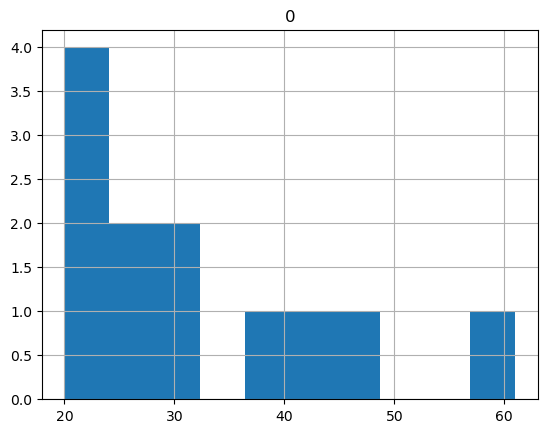

In [62]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [63]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [64]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [68]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\paula\AppData\Local\Temp\ipykernel_7320\645094770.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, hist= False, kde= True)


<Axes: ylabel='Density'>

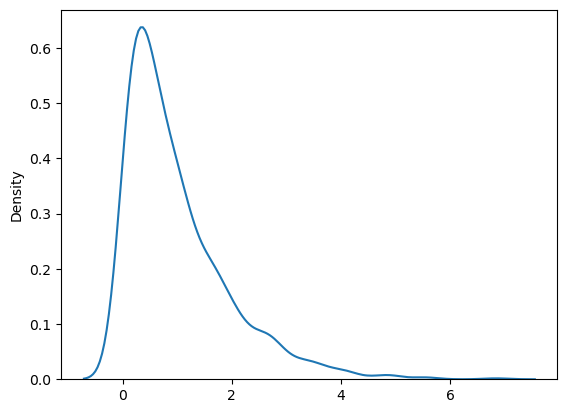

In [69]:
from scipy. stats import boxcox

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\paula\AppData\Local\Temp\ipykernel_7320\2839650521.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False, kde=True)


<Axes: ylabel='Density'>

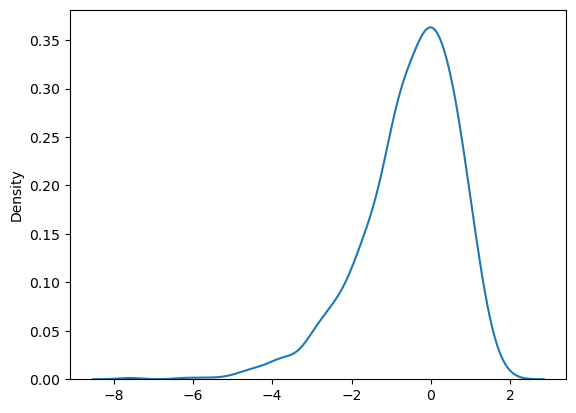

In [70]:
transformed_data = np.log(data)
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\paula\AppData\Local\Temp\ipykernel_7320\673703192.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformed_data, hist=False , kde=True)


<Axes: ylabel='Density'>

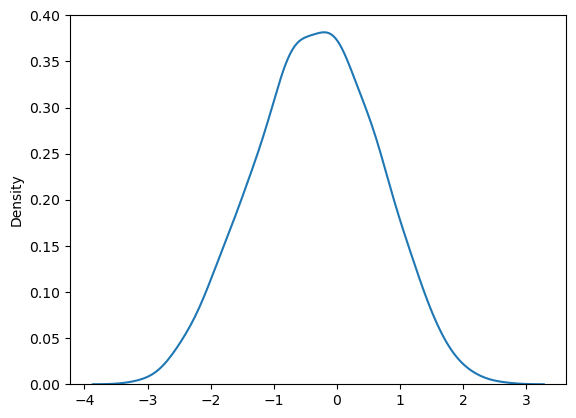

In [71]:
transformed_data, best_lambda = boxcox(data)

sns.distplot(transformed_data, hist=False , kde=True)

In [72]:
best_lambda

0.28094034465171924

# Домашнее задание

In [259]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

Задача: добиться наименьшего MSE на test.

In [261]:
df['supply-system'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [262]:
df['models_country-from'].unique()

array([16, 34, 35, 10,  9, 26,  5, 15, 12, 18, 28, 24, 27,  7, 14,  1, 13,
       19, 22, 25, 23, 36, 17, 32,  8, 31, 33, 21, 20,  3,  0,  4,  6, 30,
        2, 29], dtype=int64)

In [263]:
df['models_group'].unique()

array([3, 0, 2, 1], dtype=int64)

In [264]:
df['gear-type'].unique()

array([1, 2, 0], dtype=int64)

In [265]:
df['engine-type'].unique()

array([2, 0, 4, 3, 1], dtype=int64)

In [266]:
df.corr('spearman')['target']

index                             0.002406
back-suspension                  -0.182254
battery-capacity                  0.029654
charge-time                       0.137006
compression                       0.103935
consumption-mixed                 0.166239
cylinders-order                   0.349834
cylinders-value                   0.492853
engine-feeding                    0.060454
engine-start                      0.269032
engine-stop                       0.115524
engine-type                      -0.153451
gear-type                         0.072652
luxury                            0.108882
max-speed                         0.258928
power-electro-kw                  0.042867
supply-system                     0.061980
valves                            0.028900
valvetrain                       -0.046091
weight                            0.537532
configurations_auto-premiere      0.134450
configurations_back-wheel-base    0.590767
configurations_front-brake        0.244462
configurati

## Baseline

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [268]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [269]:
train_X

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
22607,31995,3,-1.0,11636,9.5,-1.0,0,4,4,1997,...,1415.0,4,2,13,50.0,2000.0,16,3,0,1
36531,51796,8,-1.0,31764,9.0,-1.0,0,4,0,1990,...,1310.0,1,2,13,48.0,1996.0,23,3,0,0
24048,34069,8,-1.0,2773,8.8,6.8,0,4,4,2009,...,1558.0,4,1,13,56.0,2012.0,10,3,0,1
34819,49346,3,-1.0,52039,14.0,5.3,0,4,5,2015,...,1590.0,4,2,13,56.0,2017.0,16,3,0,0
1328,1890,3,-1.0,20689,18.0,7.5,0,5,5,2004,...,1560.0,4,2,13,70.0,2009.0,28,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,8939,6,-1.0,42729,16.5,4.7,0,4,5,2017,...,1630.0,4,2,13,68.0,-1.0,10,3,0,1
11284,16109,0,-1.0,46093,8.1,-1.0,3,7,0,1987,...,1486.0,4,2,13,82.0,1996.0,34,3,0,1
38158,54067,3,-1.0,48819,10.0,7.6,0,4,2,2018,...,1636.0,4,2,13,62.0,-1.0,26,3,0,1
860,1217,10,-1.0,9346,22.4,-1.0,0,4,6,1992,...,1460.0,1,2,13,50.0,1995.0,16,3,0,1


In [270]:
reg = LinearRegression().fit(train_X, train_y)

In [271]:
reg.score(train_X, train_y)

0.45554067850400504

In [272]:
reg.score(test_X, test_y)

0.4646243987792361

In [273]:
mean_squared_error(reg.predict(train_X), train_y)

29840.12125086529

In [274]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854425

In [275]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(test_y, reg.predict(test_X))

0.4646243987792361

In [276]:
df = pd.get_dummies(df, columns=['supply-system'],  drop_first=True)
df = pd.get_dummies(df, columns=['models_country-from'],  drop_first=True)
df = pd.get_dummies(df, columns=['models_group'],  drop_first=True)
df = pd.get_dummies(df, columns=['gear-type'],  drop_first=True)
df = pd.get_dummies(df, columns=['engine-type'],  drop_first=True)

In [277]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,models_country-from_36,models_group_1,models_group_2,models_group_3,gear-type_1,gear-type_2,engine-type_1,engine-type_2,engine-type_3,engine-type_4
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,False,False,False,True,True,False,False,True,False,False
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,False,False,False,True,False,True,False,True,False,False
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,False,False,False,True,True,False,False,False,False,False
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,False,False,False,True,True,False,False,True,False,False
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,False,False,False,True,True,False,False,True,False,False
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,False,False,False,True,True,False,False,True,False,False
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,False,False,False,True,True,False,False,True,False,False
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,False,False,False,True,False,False,False,True,False,False


In [278]:
X = df.drop(["target"], axis=1)

y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [279]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
train_X_st = scaler.fit_transform(train_X)

In [280]:
test_X_st = scaler.fit_transform(test_X)

In [281]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = Ridge().fit(train_X_st, train_y)

In [282]:
reg.score(train_X_st, train_y)

0.4990382482439014

In [283]:
reg.score(test_X_st, test_y)

0.5070208448745053

In [284]:
mean_squared_error(reg.predict(train_X_st), train_y)

27456.154802113753

In [285]:
mean_squared_error(reg.predict(test_X_st),test_y)

28564.466451024517